# Assignment 1

## Loading data

In [1]:
import aa
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
dataset = DataLoader(data_dir="/home/guszarzmo@GU.GU.SE/Corpora/DrugDrug-Interaction", device=device)

Dataset building ...
Building finished.

Get Sequences ...
Finished.


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d610.s0,1,0,8,Test
1,DDI-DrugBank.d610.s0,4,9,24,Test
2,DDI-DrugBank.d610.s0,5,25,35,Test
3,DDI-DrugBank.d610.s0,6,36,38,Test
4,DDI-DrugBank.d610.s0,7,39,47,Test


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d610.s0,2,39,47
1,DDI-DrugBank.d610.s0,2,91,101
2,DDI-DrugBank.d610.s0,2,105,115
3,DDI-DrugBank.d610.s0,2,138,148
4,DDI-DrugBank.d610.s0,2,153,163


In [6]:
dataset.vocab[:15]

['padpad',
 'startseq',
 'endseq',
 'unk',
 'pharmacokinetic',
 'properties',
 'of',
 'abacavir',
 'were',
 'not',
 'altered',
 'by',
 'the',
 'addition',
 'either']

In [7]:
dataset.id2ner

{0: 'padpad',
 1: 'O',
 2: 'B-drug',
 3: 'B-brand',
 4: 'B-group',
 5: 'I-group',
 6: 'I-drug',
 7: 'I-brand',
 8: 'B-drug_n',
 9: 'I-drug_n'}

In [8]:
dataset.max_sample_length

172

In [32]:
# dataset.get_random_sample()
dataset.get_random_sample_1()

--- Data parsed ---


,tokens,labels
0,startseq,O
1,as,O
2,with,O
3,other,O
4,drugs,O
5,that,O
6,block,O
7,angiotensin,O
8,ii,O
9,or,O



--- Data from xml file ---
file path: /home/guszarzmo@GU.GU.SE/Corpora/DrugDrug-Interaction/Train/DrugBank/Losartan_ddi.xml

As with other drugs that block angiotensin II or its effects, concomitant use of potassium-sparing diuretics (e.g., spironolactone, triamterene, amiloride), potassium supplements, or salt substitutes containing potassium may lead to increases in serum potassium.



,ner,label
0,potassium-sparing diuretics,group
1,spironolactone,drug
2,triamterene,drug
3,amiloride,drug
4,potassium,drug


### Data Exploration

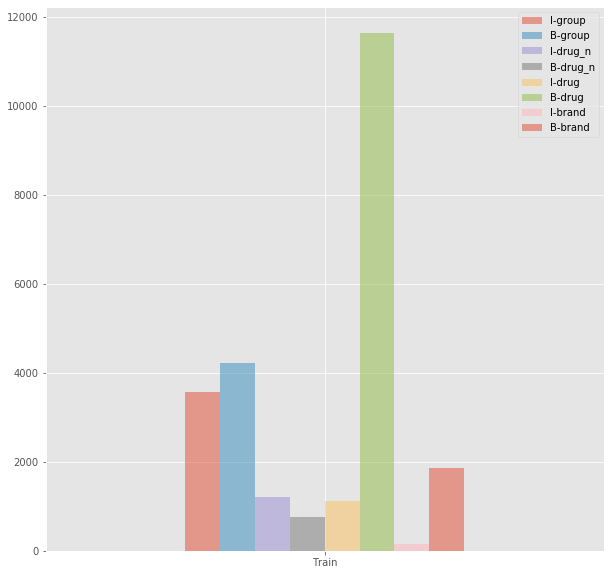

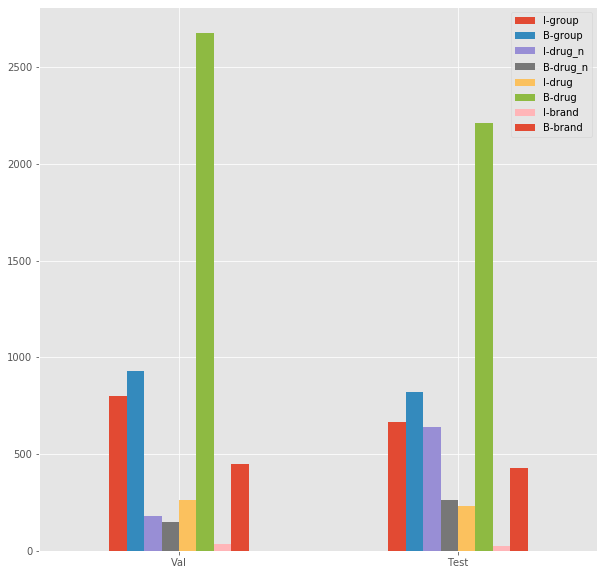

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        dataset=dataset
                                                       ))

Loading spacy ...
Loading Finished.

Get features for train dataset ...
Get features for val dataset ...
Get features for test dataset ...
Finish.


## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

max count is:  93


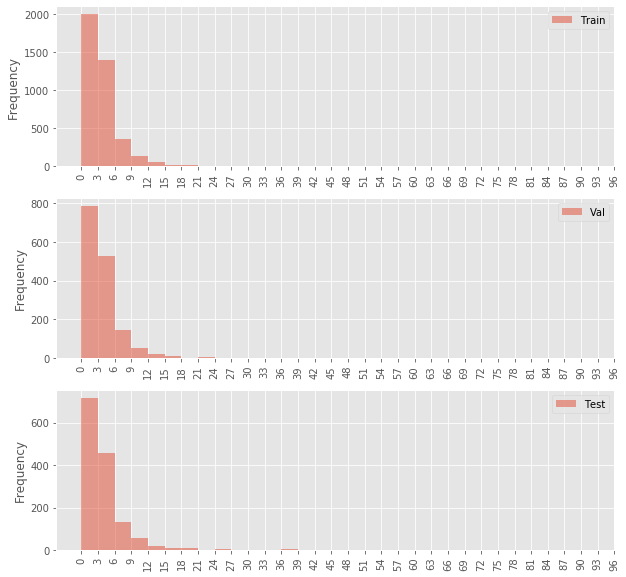

In [14]:
dataset.plot_ner_per_sample_distribution()

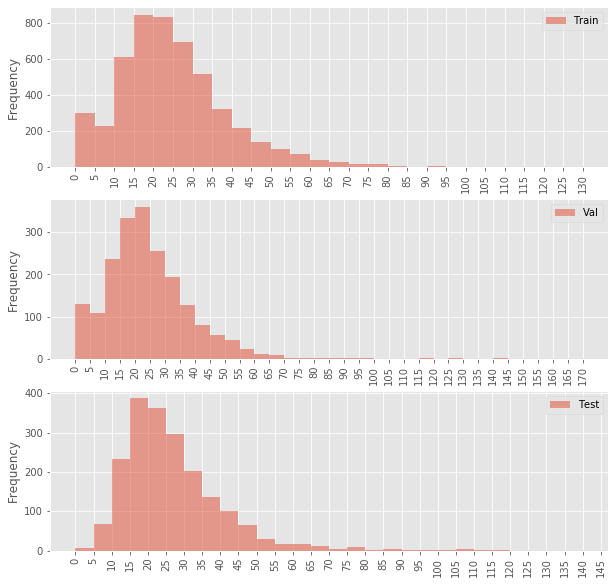

In [15]:
dataset.plot_sample_length_distribution()

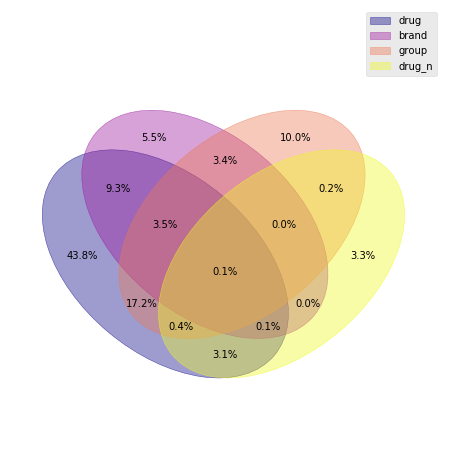

In [16]:
dataset.plot_ner_cooccurence_venndiagram()